In [ ]:
! pip install -q tensorflow tensorflow-datasets


import libraries


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
import tensorflow_datasets as tfds

from tensorflow import keras

## Find datasets


In [ ]:
tfds.list_builders()

['abstract_reasoning',
 'accentdb',
 'aeslc',
 'aflw2k3d',
 'ag_news_subset',
 'ai2_arc',
 'ai2_arc_with_ir',
 'ai2dcaption',
 'aloha_mobile',
 'amazon_us_reviews',
 'anli',
 'answer_equivalence',
 'arc',
 'asimov_dilemmas_auto_val',
 'asimov_dilemmas_scifi_train',
 'asimov_dilemmas_scifi_val',
 'asimov_injury_val',
 'asimov_multimodal_auto_val',
 'asimov_multimodal_manual_val',
 'asqa',
 'asset',
 'assin2',
 'asu_table_top_converted_externally_to_rlds',
 'austin_buds_dataset_converted_externally_to_rlds',
 'austin_sailor_dataset_converted_externally_to_rlds',
 'austin_sirius_dataset_converted_externally_to_rlds',
 'bair_robot_pushing_small',
 'bc_z',
 'bccd',
 'beans',
 'bee_dataset',
 'beir',
 'berkeley_autolab_ur5',
 'berkeley_cable_routing',
 'berkeley_fanuc_manipulation',
 'berkeley_gnm_cory_hall',
 'berkeley_gnm_recon',
 'berkeley_gnm_sac_son',
 'berkeley_mvp_converted_externally_to_rlds',
 'berkeley_rpt_converted_externally_to_rlds',
 'big_patent',
 'bigearthnet',
 'billsum',
 '

## Get info of the data

In [ ]:
builder = tfds.builder("rock_paper_scissors")
info = builder.info

info

tfds.core.DatasetInfo(
    name='rock_paper_scissors',
    full_name='rock_paper_scissors/3.0.0',
    description="""
    Images of hands playing rock, paper, scissor game.
    """,
    homepage='http://laurencemoroney.com/rock-paper-scissors-dataset',
    data_dir='/root/tensorflow_datasets/rock_paper_scissors/3.0.0',
    file_format=tfrecord,
    download_size=Unknown size,
    dataset_size=Unknown size,
    features=FeaturesDict({
        'image': Image(shape=(300, 300, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=3),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    nondeterministic_order=False,
    splits={
    },
    citation="""@ONLINE {rps,
    author = "Laurence Moroney",
    title = "Rock, Paper, Scissors Dataset",
    month = "feb",
    year = "2019",
    url = "http://laurencemoroney.com/rock-paper-scissors-dataset"
    }""",
)

## Prepare Rock, Paper, Scissors

In [ ]:
ds_train = tfds.load(name = "rock_paper_scissors", split = "train")
ds_test = tfds.load(name = "rock_paper_scissors", split = "test")

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/rock_paper_scissors/incomplete.LSY7LQ_3.0.0/rock_paper_scissors-train.tfre…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/rock_paper_scissors/incomplete.LSY7LQ_3.0.0/rock_paper_scissors-test.tfrec…

Dataset rock_paper_scissors downloaded and prepared to /root/tensorflow_datasets/rock_paper_scissors/3.0.0. Subsequent calls will reuse this data.


## show some examples

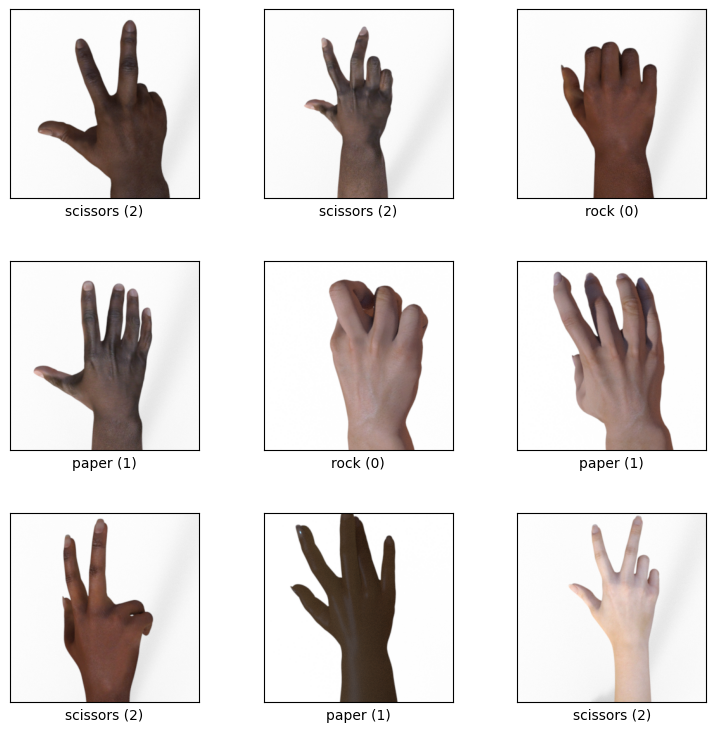

In [ ]:
fig = tfds.show_examples(info, ds_train)

## Additional data prep

In [ ]:
train_images = np.array([example['image'].numpy()[:,:,0] for example in ds_train])
# It creates a list called train_images that contains only the 'image' part of each example in a dataset ds.
#called list comprehension
train_labels = np.array([example['label'].numpy() for example in ds_train])

test_images = np.array([example['image'].numpy()[:,:,0] for example in ds_test])
test_labels = np.array([example['label'].numpy() for example in ds_test])



scaling values between 0 and 1,
Neural networks work better with floating-point numbers (instead of int).

astype('float32') converts the pixel data from integers (0–255) to 32-bit floating-point numbers.

In [ ]:
train_images = train_images.reshape(2520, 300, 300, 1)
# 1 is an element to color channel, letting keras know it is a gray scale
test_images = test_images.reshape(372, 300, 300, 1)

train_images = train_images.astype('float32')
test_images = test_images.astype('float32')


#normalizing
train_images /= 255
test_images /= 255


In [ ]:
train_images.dtype

dtype('float32')

## Train a network

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(512, input_shape = (300, 300, 1), activation = 'relu'),
    keras.layers.Dense(256, activation = 'relu'),
    keras.layers.Dense(3, activation = 'softmax'),


])

model.compile(optimizer = 'adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5, batch_size=32)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/nn.py:708: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - accuracy: 0.3892 - loss: 47.1126
Epoch 2/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.6387 - loss: 2.0187
Epoch 3/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.6730 - loss: 1.8021
Epoch 4/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7803 - loss: 0.6571
Epoch 5/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9126 - loss: 0.2647


In [ ]:
model.evaluate(test_images, test_labels)

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.5123 - loss: 1.4619


[1.5568867921829224, 0.4811827838420868]

## Train a network(convolutional approach)

In [ ]:
model = keras.Sequential([
    keras.layers.Conv2D(64, 3, activation='relu', input_shape=(300, 300, 1)),
    keras.layers.Conv2D(32, 3, activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(3, activation='softmax')

])

model.compile(optimizer = 'adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5, batch_size=32)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/nn.py:708: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


79/79 ━━━━━━━━━━━━━━━━━━━━ 46s 318ms/step - accuracy: 0.5946 - loss: 11.2935
Epoch 2/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 11s 139ms/step - accuracy: 0.9751 - loss: 0.1406
Epoch 3/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 21s 141ms/step - accuracy: 0.9985 - loss: 0.0106
Epoch 4/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 20s 139ms/step - accuracy: 0.9998 - loss: 0.0059
Epoch 5/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 21s 140ms/step - accuracy: 1.0000 - loss: 0.0017


In [ ]:
model.evaluate(test_images, test_labels)

/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/nn.py:708: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


12/12 ━━━━━━━━━━━━━━━━━━━━ 13s 645ms/step - accuracy: 0.5760 - loss: 1.7804


[1.9268040657043457, 0.5618279576301575]

## A better network

previous one was overfitting: When the training data is limited, the model can easily learn the noise and specific examples, rather than the general patterns

In [ ]:
model = keras.Sequential([
    keras.layers.AveragePooling2D(6, 3, input_shape=(300, 300, 1)),
    keras.layers.Conv2D(64, 3, activation='relu'),
    keras.layers.Conv2D(32, 3, activation='relu'),
    keras.layers.MaxPool2D(2,2),
    keras.layers.Dropout(0.5), # cut 50% of connections
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(3, activation='softmax')

])

model.compile(optimizer = 'adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5, batch_size=32)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/pooling/base_pooling.py:23: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(name=name, **kwargs)


Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/nn.py:708: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step - accuracy: 0.5627 - loss: 1.1556
Epoch 2/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.9678 - loss: 0.1546
Epoch 3/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.9932 - loss: 0.0313
Epoch 4/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.9987 - loss: 0.0127
Epoch 5/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.9987 - loss: 0.0104


In [ ]:
model.evaluate(test_images, test_labels)

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.6620 - loss: 1.4549


[1.6573394536972046, 0.6370967626571655]

## Hyperparameter Tuning

In [ ]:
!pip install -U keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 4.0 MB/s eta 0:00:00


In [ ]:
from kerastuner import RandomSearch

def build_model(hp):
  model = keras.Sequential()


  model.add(keras.layers.AveragePooling2D(6, 3, input_shape=(300, 300, 1)))

  for i in range(hp.Int("Conv Layers", min_value = 0, max_value = 3)):
    model.add(keras.layers.Conv2D(hp.Choice(f"layer_{i}_filters", [16, 32, 64]), 3, activation='relu'))


  model.add(keras.layers.MaxPool2D(2,2))
  model.add(keras.layers.Dropout(0.5)) # cut 50% of connections
  model.add(keras.layers.Flatten())

  model.add(keras.layers.Dense(hp.Choice("Dense layer", [64, 128, 256, 512, 1024]), activation='relu'))

  model.add(keras.layers.Dense(3, activation='softmax'))


  model.compile(optimizer = 'adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
  return model

tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=3,
    directory = './new_directory'
)

tuner.search(train_images, train_labels, validation_data=(test_images, test_labels), epochs = 10, batch_size = 32)


Trial 9 Complete [00h 00m 34s]
val_accuracy: 0.7150537371635437

Best val_accuracy So Far: 0.7526881694793701
Total elapsed time: 00h 05m 16s


In [ ]:
best_model = tuner.get_best_models()[0]

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
best_model.evaluate(test_images, test_labels)

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.7503 - loss: 0.8581


[0.8945857882499695, 0.7526881694793701]

In [ ]:
tuner.results_summary()

Results summary
Results in ./new_directory/untitled_project
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 02 summary
Hyperparameters:
Conv Layers: 3
Dense layer: 128
layer_0_filters: 32
layer_1_filters: 16
layer_2_filters: 16
Score: 0.7526881694793701

Trial 06 summary
Hyperparameters:
Conv Layers: 1
Dense layer: 256
layer_0_filters: 32
layer_1_filters: 16
layer_2_filters: 16
Score: 0.75

Trial 00 summary
Hyperparameters:
Conv Layers: 2
Dense layer: 64
layer_0_filters: 16
layer_1_filters: 16
Score: 0.7392473220825195

Trial 03 summary
Hyperparameters:
Conv Layers: 2
Dense layer: 64
layer_0_filters: 16
layer_1_filters: 64
layer_2_filters: 32
Score: 0.7392473220825195

Trial 01 summary
Hyperparameters:
Conv Layers: 2
Dense layer: 64
layer_0_filters: 32
layer_1_filters: 32
Score: 0.7231183052062988

Trial 08 summary
Hyperparameters:
Conv Layers: 2
Dense layer: 256
layer_0_filters: 32
layer_1_filters: 32
layer_2_filters: 32
Score: 0.7150537371635437

Trial 0

## Save and load our model

In [ ]:
best_model.save('./my_model.keras')

In [ ]:
loaded_model = keras.models.load_model('./my_model.keras')

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 22 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
loaded_model.evaluate(test_images, test_labels)

/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/nn.py:708: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.7503 - loss: 0.8581


[0.8945857882499695, 0.7526881694793701]

## Plot image from numpy array

(300, 300, 3)

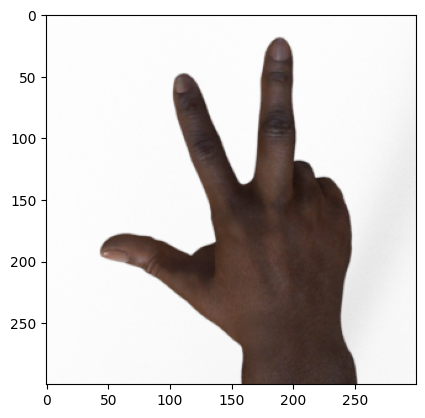

In [ ]:
rgb_images = np.array([example['image'].numpy() for example in ds_train.take(1)])

rgb_image = rgb_images[0]

image = train_images[0].reshape(300, 300)

plt.imshow(rgb_image)
rgb_image.shape


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Prediction (probabilities for each class): [[0.00148126 0.3098237  0.6886951 ]]
Predicted class: scissors
True label: scissors


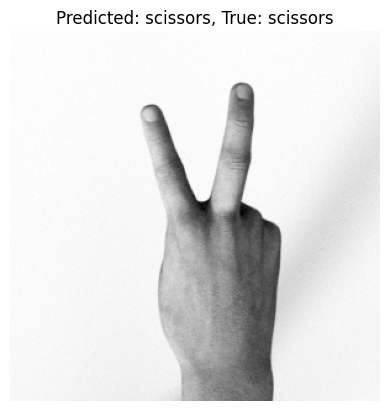

In [ ]:
# Get the first image from the test set and expand dimensions to match model input
image_to_test = np.expand_dims(test_images[0], axis=0)

# Make a prediction
prediction = best_model.predict(image_to_test)

# Get the predicted class (index with the highest probability)
predicted_class = np.argmax(prediction)

# Define class names
class_names = info.features['label'].names

# Print the prediction and predicted class name
print("Prediction (probabilities for each class):", prediction)
print("Predicted class:", class_names[predicted_class])
print("True label:", class_names[test_labels[0]])

# Show the image
plt.imshow(test_images[0].reshape(300, 300), cmap='gray')
plt.title(f"Predicted: {class_names[predicted_class]}, True: {class_names[test_labels[0]]}")
plt.axis('off')
plt.show()